In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from  evaluation.core import State
from typing import Dict, List
import datetime
import torch
import torch.nn as nn
from torch.distributions.categorical import Categorical
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
from copy import deepcopy
import random
from Rushi.PPO.trainer import PPOTrainer
from Rushi.PPO.ml import PPOAgent
from Rushi.PPO.core import EarlyEnvironment, EarlyEnvs
from Rushi.PPO.utils import Logger, makeFeatures, getInvalidActionMask, getStateFeatures, getStockFeatures, interpolatorNotForDay
from evaluation.core import BaseStrategy
from evaluation.constants import HOLD_ACTION,BUY_ACTION,SELL_ACTION
from Rushi.PPO.constants import MAX_HOLDING, MAX_TRADE_TIME_IN_5_MINUTE, MAX_TRADE_TIME_IN_DAYS, MAX_TRADE_TIME_IN_MINUTE, MODES, minutes_5_in_day, minutes_in_day, ROLLING_WINDOW_SIZE_IN_MINUTE, ROLLING_WINDOW_SIZE_IN_5_MINUTE,end_time_5_minute, end_time_minute
from Rushi.PPO.constants import end_time_minute, end_time_5_minute
from Rushi.PPO.ppoStrategy import PPOStrategy
from evaluation.backTest import BackTest
from tqdm import tqdm

In [2]:
df = pd.read_csv("data/5minute/APOLLOHOSP.csv")
df = interpolatorNotForDay(df= df, mode= "5minute")

total values interpolated = 1230


In [8]:

close = df.close.values
normed_close = (close - close.mean())/close.std()

window_norm = (df.close - df.close.rolling(ROLLING_WINDOW_SIZE_IN_5_MINUTE).mean())/(df.close.rolling(ROLLING_WINDOW_SIZE_IN_5_MINUTE).std())
window_norm = window_norm.values[ROLLING_WINDOW_SIZE_IN_5_MINUTE:]
close = close[ROLLING_WINDOW_SIZE_IN_5_MINUTE:]
normed_close = normed_close[ROLLING_WINDOW_SIZE_IN_5_MINUTE:]

returns = (df.close.iloc[1:].values - df.close.iloc[:-1].values)/df.close.iloc[:-1].values
returns = returns[ROLLING_WINDOW_SIZE_IN_5_MINUTE:]


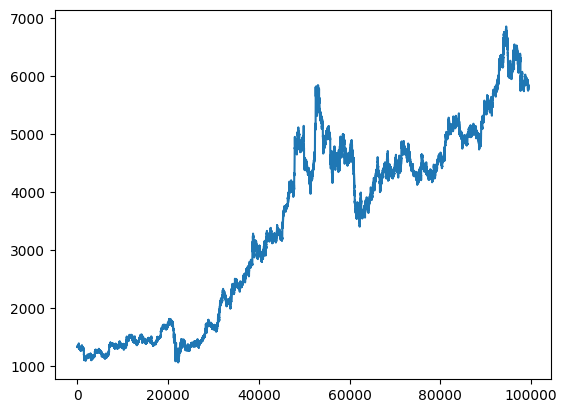

In [9]:
plt.plot(close)

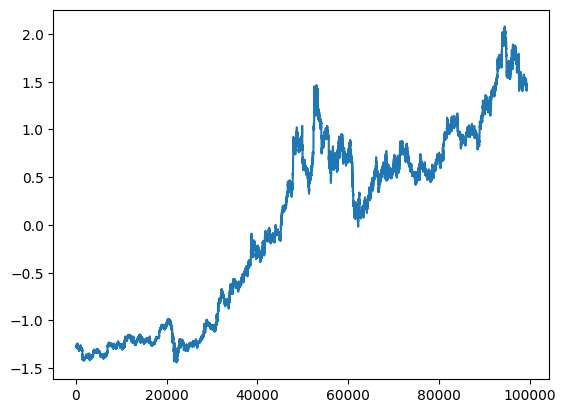

In [10]:
plt.plot(normed_close)


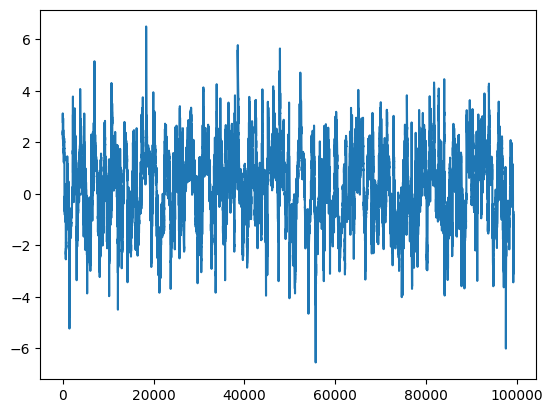

In [11]:
plt.plot(window_norm)

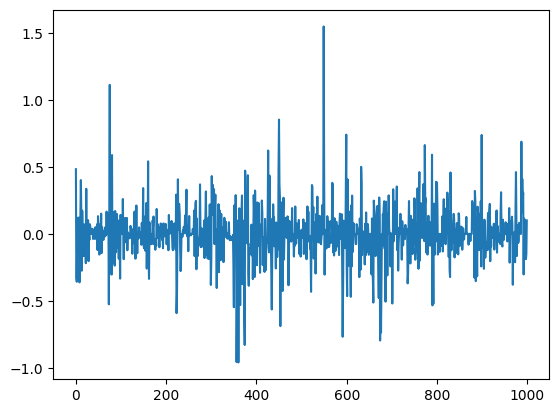

In [19]:
plt.plot(returns[:1000]*100)